In [35]:
import pandas as pd
import matplotlib.pyplot as plt 

typing_data = pd.read_csv('typing_data.csv')
# Filter the data for the specific id
id_data = typing_data[typing_data['id'] == 'NMMGWRY6SO'] 

In [30]:
num_rows = len(id_data) #this is only half the number of rows in the original dataset, I'm not sure what happened.......
print(f'The number of rows is: {num_rows}') 

average_latency = typing_data['latency'].mean()
print(f'The average latency is: {average_latency}')

average_hold_time = typing_data['hold_time'].mean()
print(f'The average hold time is: {average_hold_time}')

average_flight_time = typing_data['flight_time'].mean()
print(f'The average flight time is: {average_flight_time}')

The number of rows is: 42779
The average latency is: 260.09854285345637
The average hold time is: 112.3714515579475
The average flight time is: 185.96295546363146


In [45]:
# Calculate the latency difference
id_data.loc[:, 'latency_diff'] = id_data['latency'] - average_latency

# Convert the 'time' column to datetime format and extract the hour
id_data.loc[:, 'hour'] = pd.to_datetime(id_data['time']).dt.hour

# Group by hour and calculate the average latency difference
hourly_latency_diff = id_data.groupby('hour')['latency_diff'].mean()

# Filter the data for the specific id
id_data_lsq = typing_data[typing_data['id'] == 'COK8G1W7JY']

# Calculate the latency difference
id_data_lsq.loc[:, 'latency_diff'] = id_data_lsq['latency'] - average_latency

# Convert the 'time' column to datetime format and extract the hour
id_data_lsq.loc[:, 'hour'] = pd.to_datetime(id_data_lsq['time']).dt.hour

# Group by hour and calculate the average latency difference
hourly_latency_diff_lsq = id_data_lsq.groupby('hour')['latency_diff'].mean()

C:\Users\Ourple\AppData\Local\Temp\ipykernel_5732\2038179815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_data.loc[:, 'latency_diff'] = id_data['latency'] - average_latency
C:\Users\Ourple\AppData\Local\Temp\ipykernel_5732\2038179815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_data.loc[:, 'hour'] = pd.to_datetime(id_data['time']).dt.hour
C:\Users\Ourple\AppData\Local\Temp\ipykernel_5732\2038179815.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Note that NMMGWRY6SO DOES have parkinsons /// COK8G1W7JY DOES NOT have parkinsons
- This is comparing latency difference. The average latency found was 260ms, so the person with parkinsosns is more average idk 

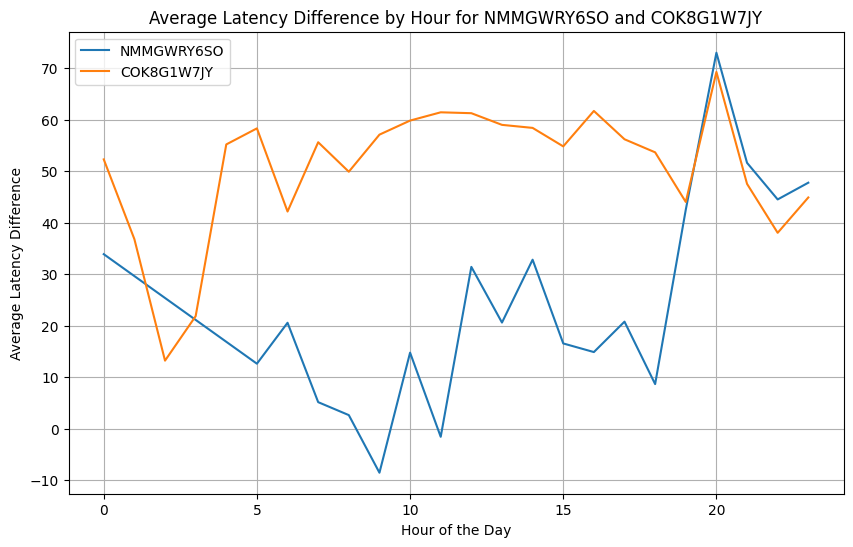

In [48]:
plt.figure(figsize=(10, 6))

# Plot the latency difference for NMMGWRY6SO
hourly_latency_diff.plot(kind='line', label='NMMGWRY6SO')

# Plot the latency difference for COK8G1W7JY
hourly_latency_diff_lsq.plot(kind='line', label='COK8G1W7JY')

plt.title('Average Latency Difference by Hour for NMMGWRY6SO and COK8G1W7JY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Latency Difference')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
p = pd.read_csv('user_data.csv')
p.head()

,id,Gender,Parkinsons,Tremors,Sided,UPDRS,Impact,age,medicated
0,PJU53Y7KVB,Male,True,True,Left,0,1,NaN,True
1,G6OE5CXQPY,Male,False,False,None,0,0,65.0,False
2,2X17VCRRQA,Male,True,True,Left,0,3,66.0,True
3,I3U47MF5UF,Female,True,True,None,0,2,70.0,True
4,L7Q16SJ7KP,Male,True,True,Right,0,3,52.0,True
